In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.8.0


In [25]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

Y = np.array([
    [0],
    [0],
    [0],
    [1]
])


In [31]:

def build_model():
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(X.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 500 == 0: 
            print('')
            print('.', end='')

EPOCHS = 2000

# Store training stats
history = model.fit(X, Y, epochs=EPOCHS,validation_split=0.2, verbose=0,callbacks=[PrintDot()])


.
.
.
.

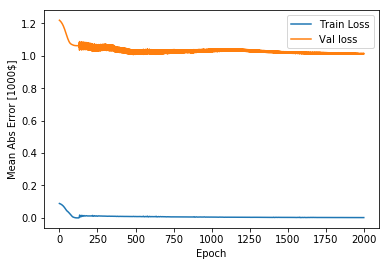

In [33]:
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),label = 'Val loss')
    plt.legend()
    #plt.ylim([0,5])
    plt.show()

plot_history(history)

In [29]:
test_predictions = model.predict(X).flatten()

print(test_predictions)

[0.00097571 0.00377323 0.00289696 0.02420663]



.

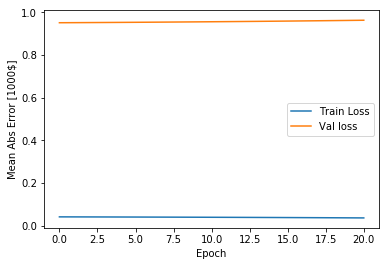

In [30]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(X, Y, epochs=EPOCHS,validation_split=0.2, verbose=0,callbacks=[early_stop, PrintDot()])

plot_history(history)